<a href="https://colab.research.google.com/github/suponev/model/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ 2.20426567e-70+0.j  2.41182066e-70+0.j  2.63885318e-70+0.j ...
 -1.30782045e-55+0.j -1.20734590e-55+0.j -1.11456253e-55+0.j]

[ 1.19096982e-70-1.85482560e-70j  1.30311226e-70-2.02947710e-70j
  1.42577846e-70-2.22051839e-70j ... -7.06618407e-56+1.10049297e-55j
 -6.52331772e-56+1.01594654e-55j -6.02200704e-56+9.37872028e-56j]

[-9.17298184e-71-2.00433310e-70j -1.00367154e-70-2.19306232e-70j
 -1.09815040e-70-2.39950241e-70j ...  5.44245345e-56+1.18919777e-55j
  5.02433175e-56+1.09783652e-55j  4.63821670e-56+1.01346884e-55j]

[-2.18220647e-70-3.11065989e-71j -2.38768435e-70-3.40356151e-71j
 -2.61244485e-70-3.72394982e-71j ...  1.29473244e-55+1.84559633e-56j
  1.19526338e-55+1.70380663e-56j  1.10340854e-55+1.57287073e-56j]

Массив А
(0.007721590423329322-0.012542655503486433j)
(0.9922784095766704+0.012542655503486433j)



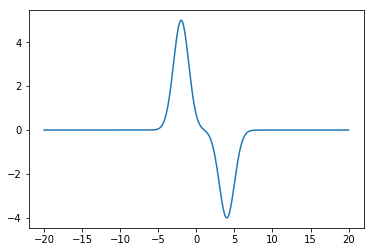

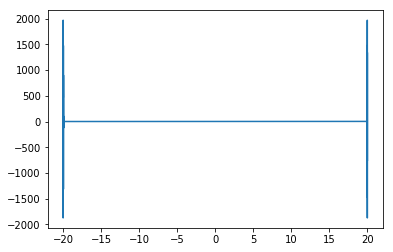

In [10]:
import random
import numpy as np 
import matplotlib.pyplot as plt

# Сигма
sig = 1

# Константа h
h = 1

# Массив значений x
x = np.arange(-20, 20 , 0.005);

# Задание сигнала
def signal(x):
    return 5*np.exp(-(x+2)**2/(2*sig**2))-4*np.exp(-(x-4)**2/(2*sig**2))
  
# Задание аппроксимирующей функции
def phi(x):
    return np.exp(-(x)**2/(2*sig**2))  
  
# Расчет мемента k (для исходного сигнала) 
def mu(x,k):
    return signal(x)*np.exp(-1j*k*h)
  
# Расчет alpha (для аппрокимирующей функции 
def alpha(x,k):
    return phi(x)*np.exp(-1j*h*k)
  
# Функция вывода массива
def printarr(arr , name):
    print(name)
    for i in range(len(arr)):
      print(arr[i])
    print('')

b = []
for k in [0,1,2,3]:
    #комплексные моменты исходного сигнала
    print(mu(x,k))
    muk = np.trapz(mu(x,k), x);
    bk = muk/np.trapz(alpha(x,k), x);
    b.append(bk);
# print(b);

q1 = (b[1] * b[2] - b[0] * b[3]) / (b[1] * b[1] - b[0] * b[2]);
q0 = (b[1] * b[3] - b[2] * b[2]) / (b[1] * b[1] - b[0] * b[2]);
D = q1 * q1 - 4 * (-q0);
sqrt_D = np.sqrt(D);

m=[0,0] 
A=[0,0]

m[0] = (q1 - sqrt_D) / 2;
m[1] = (q1 + sqrt_D) / 2;

A[0] = (b[1] - b[0] * m[1]) / (m[0] - m[1]);
A[1]= b[0] - A[0];

printarr(A,'Массив А')

sp =np.fft.fft(signal(x))

# plt.plot(x, sp.real)

plt.plot(x , signal(x) )
plt.show()

plt.plot(x , sp.real)
plt.show()


